# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings

In [5]:
sns.set(style="whitegrid")
%matplotlib inline

# Load the data from CSV

In [7]:
df = pd.read_csv("ipsc_differentiation_data_with_genes.csv")

In [8]:
df.head()

,Batch_ID,BMP4,ActivinA,FGF2,Wnt3a,O2_Level,Seeding_Density,Passage_Number,POU5F1,NANOG,SOX2,CDX2,NEUROD1,Purity,Viability,Yield
0,Batch_001,37.454012,3.142919,64.203165,5.168172,5,85625.970694,6,6.300274,7.558737,4.614774,5.400576,4.432561,6.748511,85.361436,81.521013
1,Batch_002,95.071431,63.641041,8.413996,53.135463,10,110033.433931,10,5.706555,4.951505,6.536430,6.101679,5.820169,15.588150,95.955719,92.918264
2,Batch_003,73.199394,31.435598,16.162871,54.063512,5,121657.233632,22,4.462686,6.242230,2.566215,4.575027,4.600644,12.413152,75.769540,86.636546
3,Batch_004,59.865848,50.857069,89.855419,63.742990,5,62433.698254,6,6.352795,6.514842,5.511483,5.183081,4.597046,12.399866,93.147184,68.926468
4,Batch_005,15.601864,90.756647,60.642906,72.609133,10,129255.518195,22,3.693130,4.254711,5.038357,4.534482,3.246656,13.342285,74.817755,95.390716


# Basic dataset shape

In [10]:
print(f"Shape: {df.shape}")

Shape: (100, 16)


In [11]:
# Info on data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Batch_ID         100 non-null    object 
 1   BMP4             100 non-null    float64
 2   ActivinA         100 non-null    float64
 3   FGF2             100 non-null    float64
 4   Wnt3a            100 non-null    float64
 5   O2_Level         100 non-null    int64  
 6   Seeding_Density  100 non-null    float64
 7   Passage_Number   100 non-null    int64  
 8   POU5F1           100 non-null    float64
 9   NANOG            100 non-null    float64
 10  SOX2             100 non-null    float64
 11  CDX2             100 non-null    float64
 12  NEUROD1          100 non-null    float64
 13  Purity           100 non-null    float64
 14  Viability        100 non-null    float64
 15  Yield            100 non-null    float64
dtypes: float64(13), int64(2), object(1)
memory usage: 12.6+ KB


In [12]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMP4,100.0,47.018074,29.748941,0.552212,19.320076,46.414245,73.020312,98.688694
ActivinA,100.0,49.783172,29.311125,0.695213,24.200453,50.562486,76.618360,98.565045
FGF2,100.0,51.760133,29.342625,0.506158,27.687986,56.255493,75.236694,99.005385
Wnt3a,100.0,49.114894,29.345222,1.439349,24.961492,50.971830,73.577751,99.050514
O2_Level,100.0,11.350000,6.429690,5.000000,5.000000,10.000000,20.000000,20.000000
Seeding_Density,100.0,121261.636255,44245.990318,52050.794724,86028.536311,114265.370770,162449.211852,199374.706254
Passage_Number,100.0,17.780000,7.475995,5.000000,11.500000,19.000000,24.000000,29.000000
POU5F1,100.0,5.131225,1.604312,1.734978,3.970706,5.339749,6.165674,8.312676
NANOG,100.0,5.046262,1.660557,0.823047,3.924477,4.947975,6.079362,9.464295
SOX2,100.0,5.290615,1.585530,0.823994,4.274047,5.292550,6.487817,8.454368


In [13]:
# Check for missing values
df.isnull().sum()

Batch_ID           0
BMP4               0
ActivinA           0
FGF2               0
Wnt3a              0
O2_Level           0
Seeding_Density    0
Passage_Number     0
POU5F1             0
NANOG              0
SOX2               0
CDX2               0
NEUROD1            0
Purity             0
Viability          0
Yield              0
dtype: int64

# Correlation Heatmap 
- Find which input features are strongly correlated with outcomes

- Understand which variables are redundant (collinear)

- Start forming hypotheses (e.g. “BMP4 may increase Purity”)

In [16]:
# Compute correlations (only numeric columns)
correlation_matrix = df.corr(numeric_only=True)

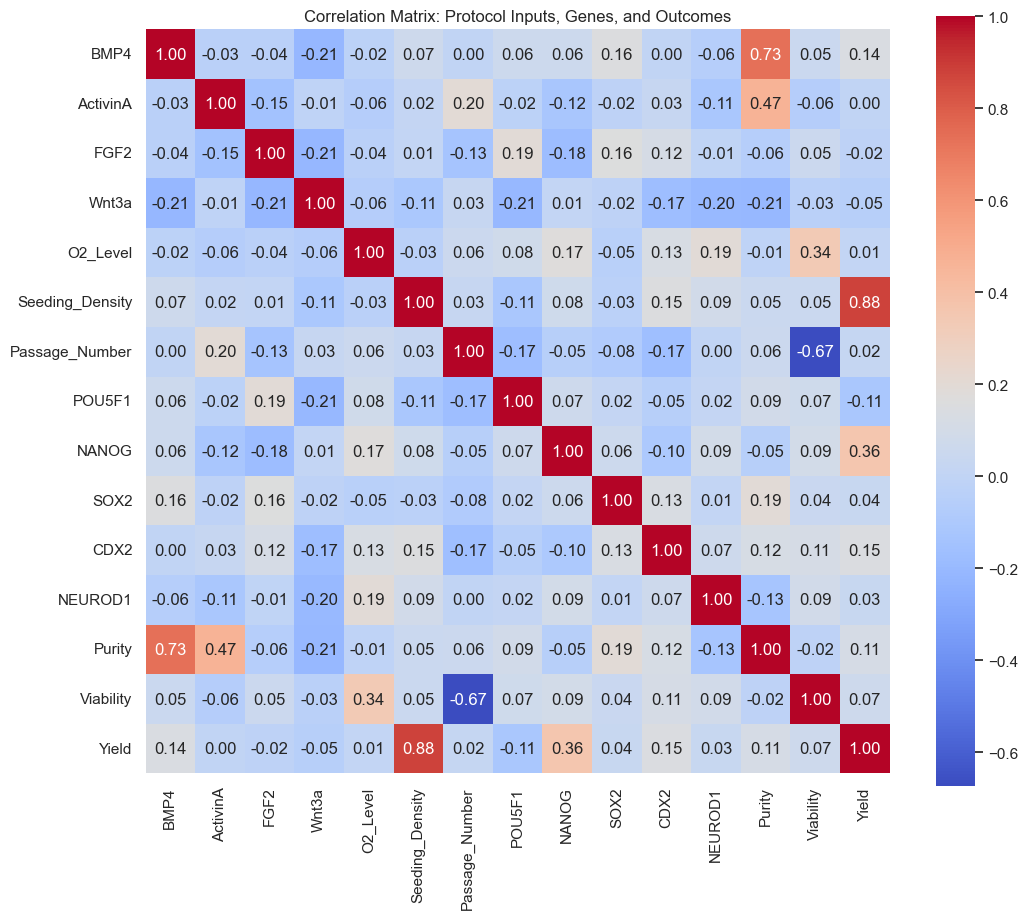

In [17]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix: Protocol Inputs, Genes, and Outcomes")
plt.show()

### Interpretation of Heatmap:
- **BMP4** shows a strong positive correlation with **Purity** (r = 0.73) → confirms its importance in iPSC differentiation protocols.
- **Passage_Number** is strongly negatively correlated with **Viability** (r = -0.67) → over-passaging reduces cell health.
- **NANOG** has moderate correlation with **Yield** (r = 0.36), possibly due to its role in self-renewal.
- **SOX2** correlates mildly with **Purity** (r = 0.26), consistent with its stemness role.
- **Seeding_Density** is highly correlated with **Yield** (r = 0.88) → might dominate model unless scaled or adjusted.
- No major multicollinearity between cytokines → all features can be used in regression models safely.

In [18]:
df.columns

Index(['Batch_ID', 'BMP4', 'ActivinA', 'FGF2', 'Wnt3a', 'O2_Level',
       'Seeding_Density', 'Passage_Number', 'POU5F1', 'NANOG', 'SOX2', 'CDX2',
       'NEUROD1', 'Purity', 'Viability', 'Yield'],
      dtype='object')